In [1]:
%load_ext autoreload
%autoreload 2

In [2]:
import logging
import pickle
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import sep
import pandas as pd
import os
from astropy.table import Table, vstack

In [3]:
from maddeb.utils import listdir_fullpath, get_data_dir_path

In [4]:
logging.basicConfig(format="%(message)s", level=logging.INFO)
LOG = logging.getLogger(__name__)

## load the saved results

In [5]:
density_level = "high"

In [6]:
data_path = "/sps/lsst/users/bbiswas/MADNESS_results/" + density_level + "_density"
run_name = "kl1" # 12 to 20 galaxies
result_dir_path = os.path.join(data_path, run_name)

In [7]:
scarlet_plot_color = sns.color_palette("colorblind")[4]
madness_plot_color = sns.color_palette("colorblind")[0]

blended_plot_color = sns.color_palette("colorblind")[1]
isolated_plot_color = sns.color_palette("colorblind")[6]

In [8]:
madness_results=[]
scarlet_results=[]
actual_photometry = []
blended_photometry = []

for file_num in range(300):

    madness_results.append(pd.read_pickle(os.path.join(result_dir_path, "madness_results", str(file_num) + ".pkl")))
    scarlet_results.append(pd.read_pickle(os.path.join(data_path, "scarlet_results", str(file_num) + ".pkl")))

    actual_photometry.append(pd.read_pickle(os.path.join(data_path, "actual_photometry", str(file_num) + ".pkl")))
    blended_photometry.append(pd.read_pickle(os.path.join(data_path, "blended_photometry",  str(file_num) + ".pkl")))

madness_results = pd.concat(madness_results)
scarlet_results = pd.concat(scarlet_results)

actual_photometry = pd.concat(actual_photometry)
blended_photometry = pd.concat(blended_photometry)

In [9]:
# mask_contamination=madness_results["r_contamination"].values<5
# madness_results=madness_results[mask_contamination]
# scarlet_results=scarlet_results[mask_contamination]
# actual_photometry=actual_photometry[mask_contamination]
# blended_photometry=blended_photometry[mask_contamination]

In [10]:
madness_results

,u_covariance,u_blendedness,g_covariance,g_blendedness,r_covariance,r_blendedness,i_covariance,i_blendedness,z_covariance,z_blendedness,...,i_phot_flux,i_phot_fluxerrs,i_phot_flags,z_phot_flux,z_phot_fluxerrs,z_phot_flags,y_phot_flux,y_phot_fluxerrs,y_phot_flags,r_contamination
0,0.977776,0.248239,0.993304,0.275573,0.992960,0.158215,0.993830,0.106299,0.993017,0.064470,...,213708.339447,5916.884639,0,249847.329771,6857.154660,0,185966.028087,7378.951528,0,0.149589
1,0.995984,0.016532,0.999308,0.034262,0.999340,0.070219,0.999568,0.067102,0.999490,0.060278,...,151541.787744,4457.186950,0,144272.352717,5134.068179,0,75277.757477,5523.083233,0,0.096954
2,0.987873,0.025625,0.995172,0.049128,0.993242,0.077536,0.993839,0.099073,0.992284,0.101349,...,22850.989854,3171.942077,0,14340.139906,3620.703048,0,2327.346661,3872.451975,0,0.075821
3,0.927787,0.718546,0.941277,0.695392,0.944269,0.822937,0.928673,0.876841,0.935851,0.924391,...,73482.589303,3410.759684,0,91904.798302,3905.700773,0,71362.881682,4182.029703,0,5.610000
4,0.993852,0.000517,0.996184,0.000684,0.996865,0.001240,0.997316,0.001570,0.997680,0.001141,...,32545.813107,3821.246584,0,38251.008060,4394.888906,0,20093.479203,4713.810435,0,0.000760
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
319,0.763241,0.062509,0.987866,0.080568,0.992928,0.096173,0.990490,0.073908,0.989659,0.045955,...,30376.087615,3677.604072,0,26593.872077,4163.586625,0,11434.078734,4506.594429,0,0.080913
320,0.989680,0.011287,0.999080,0.007629,0.998933,0.007695,0.999111,0.006501,0.999010,0.008382,...,72430.724691,3147.997685,0,42392.233921,3556.932894,0,20948.493362,3835.568783,0,0.004617
321,0.995540,0.017800,0.997025,0.026836,0.996843,0.041607,0.996566,0.042018,0.997086,0.026870,...,35651.375041,3537.935322,0,42420.184035,4005.379920,0,18760.941017,4325.890064,0,0.028881
322,0.762086,0.711482,0.980510,0.710990,0.975134,0.762826,0.969563,0.674817,0.975070,0.642035,...,41451.880518,3232.691768,0,39427.721206,3655.287395,0,13205.140447,3941.161449,0,3.347219


# Pixel Covariance

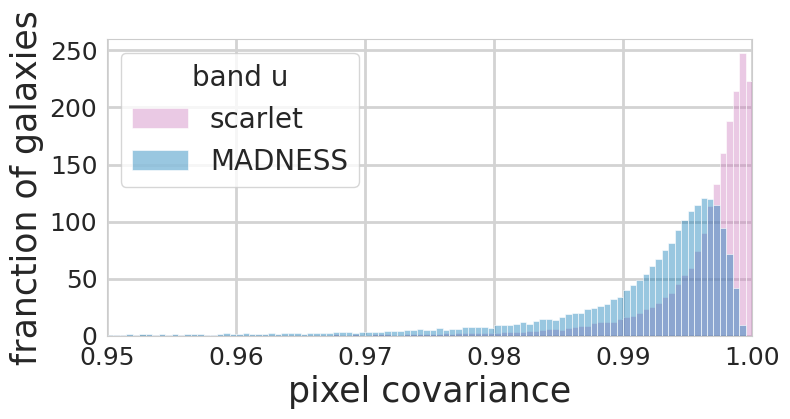

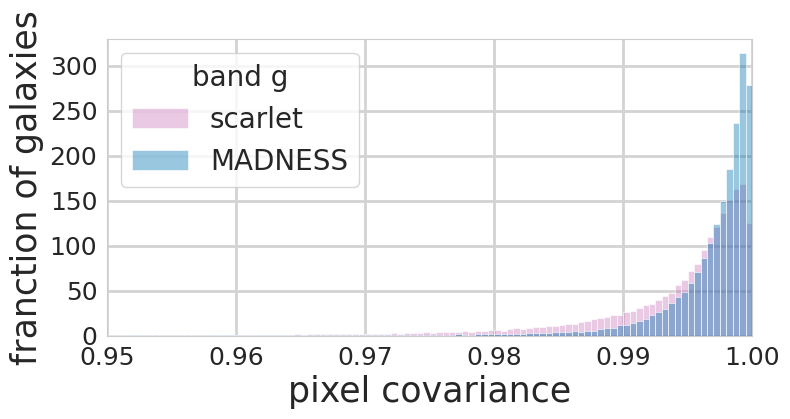

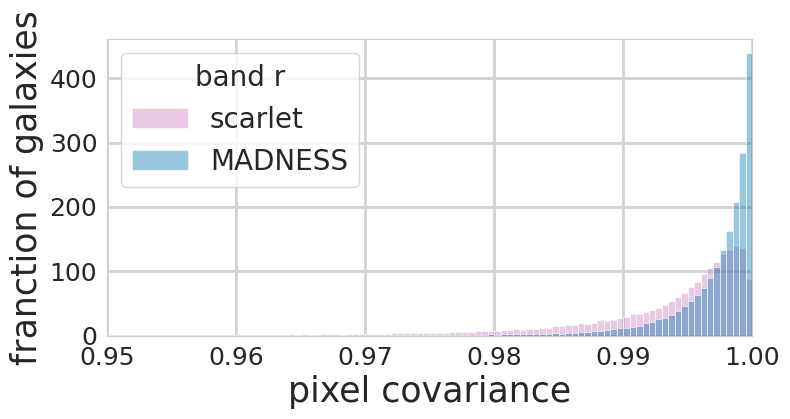

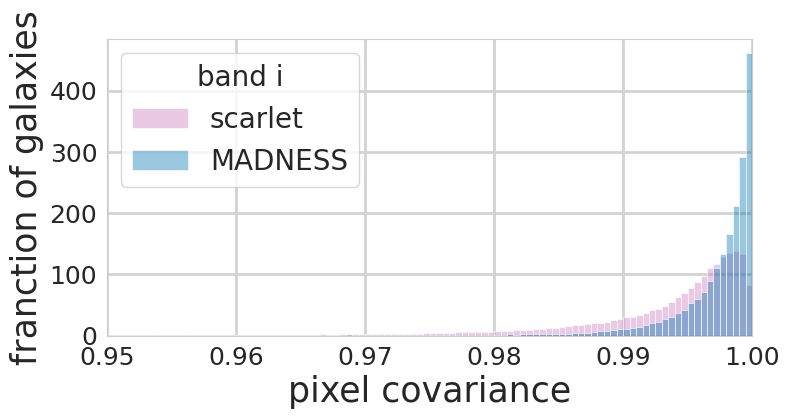

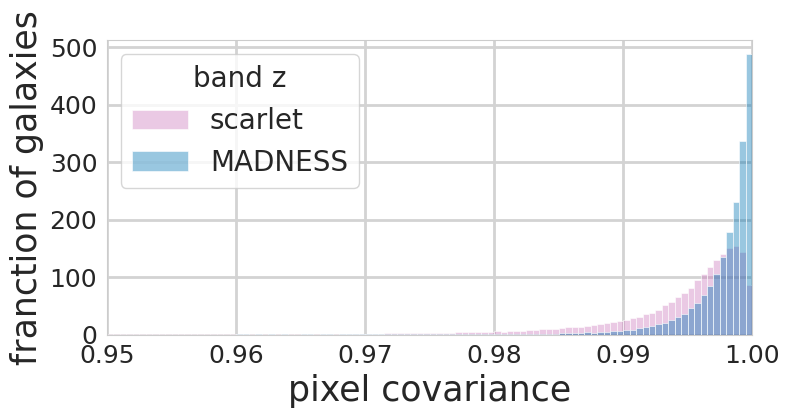

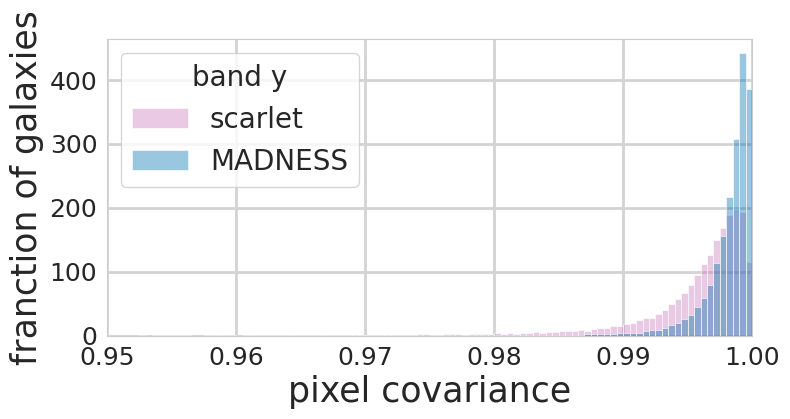

In [11]:
bins = np.arange(0.95, 1, 0.0005)
for band_number, band in enumerate(['u', 'g', 'r', 'i', 'z', 'y']):
    plt.figure(figsize=(8, 4))
    sns.set_style("whitegrid")
    mask = (actual_photometry[band+"_phot_flux"].values/actual_photometry[band+"_phot_fluxerrs"].values)>5
    sns.histplot(scarlet_results[mask][band + '_covariance'].values, bins=bins, alpha=0.4, label="scarlet", color=scarlet_plot_color, stat='density')
    sns.histplot(madness_results[mask][band + '_covariance'].values, bins=bins, alpha=0.4, label="MADNESS", color=madness_plot_color, stat='density')
    plt.legend()
    plt.xlim([0.95, 1])
    plt.xticks(fontsize=18)
    plt.yticks(fontsize=18)
    plt.xlabel("pixel covariance", fontsize=25)
    plt.ylabel("franction of galaxies", fontsize=25)
    plt.legend(fontsize=20, title="band " + band, loc="upper left", title_fontsize=20)
    ax = plt.gca()
    ax.grid(color='lightgray', linestyle='-', linewidth=2)
    plt.tight_layout()
    plt.savefig(result_dir_path + "/cov_res_"+band)
    plt.show()

# Relative error in apperture photometry (elliptical apertures)

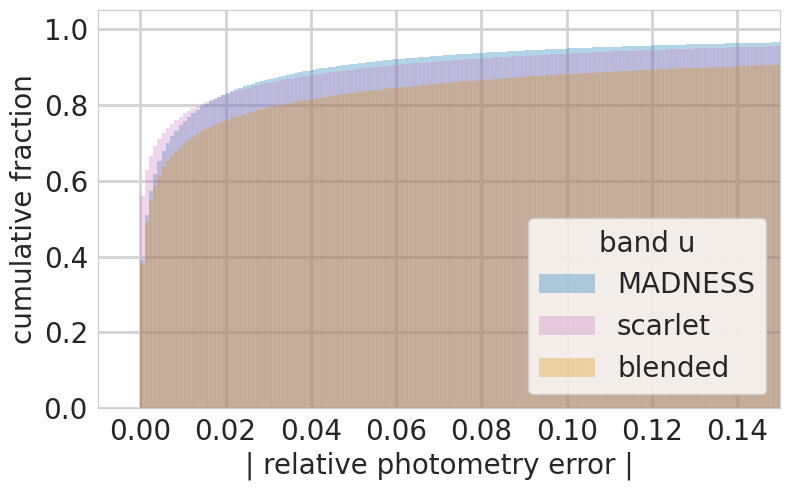

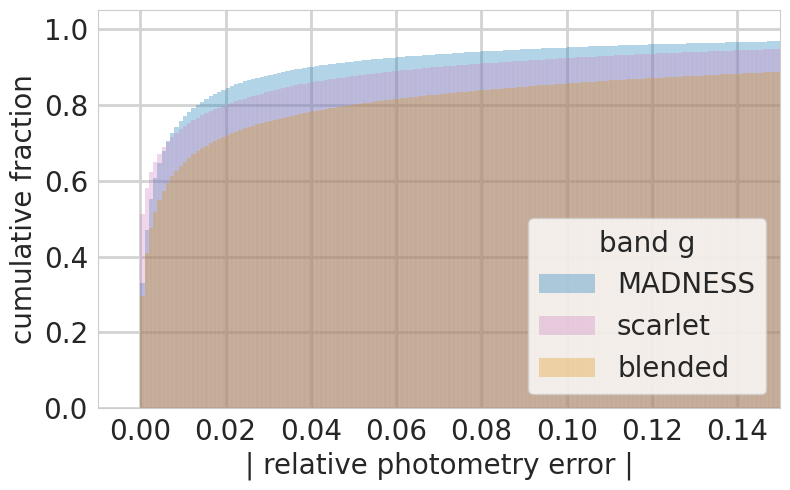

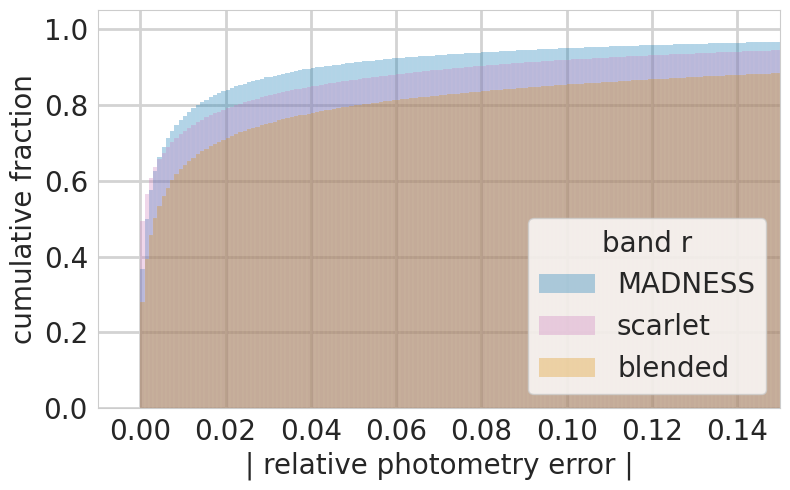

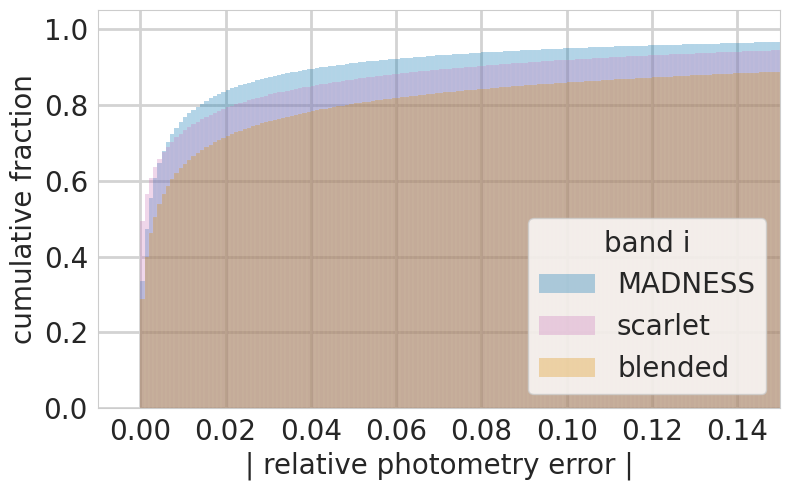

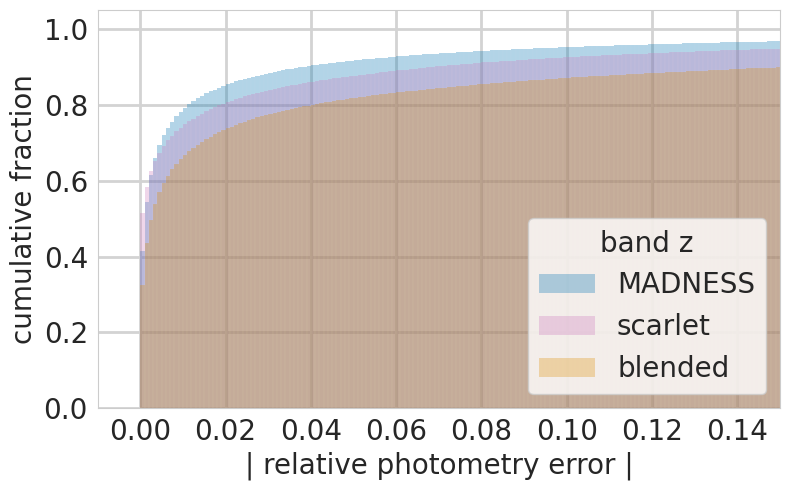

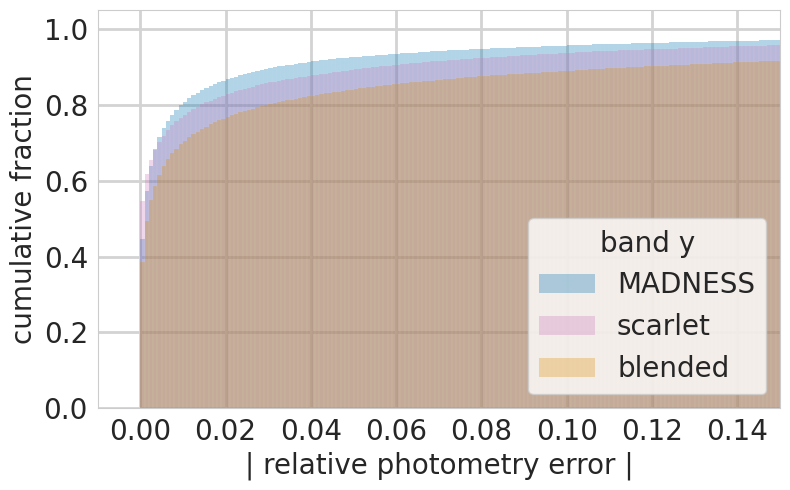

In [12]:
for band in ['u', 'g', 'r', 'i', 'z', 'y']:

    #sns.set(rc={'axes.facecolor':'white', 'figure.facecolor':'white'})
    sns.set_style("whitegrid")
#     sns.set_theme(style={"axes.grid": True,'grid.color': 'black',
# })
    plt.figure(figsize=(8, 5))
    bins = np.arange(-1, 1, 0.001)
    mask = (actual_photometry[band+"_phot_flux"].values/actual_photometry[band+"_phot_fluxerrs"].values)>5
    sns.histplot(
        np.abs((madness_results[band+"_phot_flux"].values[mask] - actual_photometry[band+"_phot_flux"].values[mask]) / actual_photometry[band+"_phot_flux"].values[mask]),
        bins=bins,
        stat='density',
        alpha=0.3,
        label="MADNESS",
        cumulative=True,
        color=madness_plot_color,
    )

    sns.histplot(
        np.abs((scarlet_results[band+"_phot_flux"].values[mask] - actual_photometry[band+"_phot_flux"].values[mask]) / actual_photometry[band+"_phot_flux"].values[mask]),
        bins=bins,
        stat='density',
        alpha=0.3,
        label="scarlet",
        cumulative=True,
        color=scarlet_plot_color,
    )

    sns.histplot(
        np.abs((blended_photometry[band+"_phot_flux"].values[mask] - actual_photometry[band+"_phot_flux"].values[mask]) / actual_photometry[band+"_phot_flux"].values[mask]),
        bins=bins,
        stat='density',
        alpha=0.3,
        label="blended",
        cumulative=True,
        color=blended_plot_color,
    )
    ax = plt.gca()
    ax.grid(color='lightgray', linestyle='-', linewidth=2)
    plt.xlim([-.01, .15])
    plt.xticks(fontsize=20)
    plt.yticks(fontsize=20)
    plt.xlabel("| relative photometry error |", fontsize=20)
    plt.ylabel("cumulative fraction", fontsize=20)
    plt.legend(fontsize=20, title="band " + band, loc="lower right", title_fontsize=20)
    plt.tight_layout()
    plt.savefig("results/"+ density_level + "_density/cumulative_distib_phot_err_"+band)
    plt.savefig("results/"+ density_level + "_density/cumulative_distib_phot_err_"+band + ".pdf", format="pdf", bbox_inches="tight")
    plt.show()

# Box plots

SNR definition here is one used to place the SNR>10 cut on the catalog.

In [13]:
boxplot_snr_df = {}

r_snr_mask = (actual_photometry["r_phot_flux"].values/actual_photometry["r_phot_fluxerrs"].values)>5

# madness_actual_flux = madness_results[band+"_actual_flux"].value
# madness_predicted_flux = madness_results[band+"_predicted_flux"].value

# scarlet_actual_flux = scarlet_results[band+"_actual_flux"].value
# scarlet_predicted_flux = scarlet_results[band+"_predicted_flux"].value

# scarlet_relative_difference = np.divide(
#     scarlet_predicted_flux - scarlet_actual_flux, scarlet_actual_flux
# )
# madness_relative_difference = np.divide(
#     madness_predicted_flux - madness_actual_flux, madness_actual_flux
# )
boxplot_snr_df["snr"] = list(madness_results['r_band_snr'][r_snr_mask])
boxplot_snr_df["type"] = ["madness"] * len(madness_results[r_snr_mask])
#boxplot_snr_df["r_relative_flux_err"] = list(madness_relative_difference)
boxplot_snr_df["r_relative_flux_err"] = list(np.abs(madness_results["r_phot_flux"].values[r_snr_mask] - actual_photometry["r_phot_flux"].values[r_snr_mask]) / actual_photometry["r_phot_flux"].values[r_snr_mask])


boxplot_snr_df["snr"].extend(list(scarlet_results['r_band_snr'][r_snr_mask]))
boxplot_snr_df["type"].extend(["scarlet"] * len(scarlet_results[r_snr_mask]))
boxplot_snr_df["r_relative_flux_err"].extend(list(np.abs(scarlet_results["r_phot_flux"].values[r_snr_mask] - actual_photometry["r_phot_flux"].values[r_snr_mask]) / actual_photometry["r_phot_flux"].values[r_snr_mask])) 

boxplot_snr_df = pd.DataFrame(boxplot_snr_df)

['madness' 'scarlet']
setting


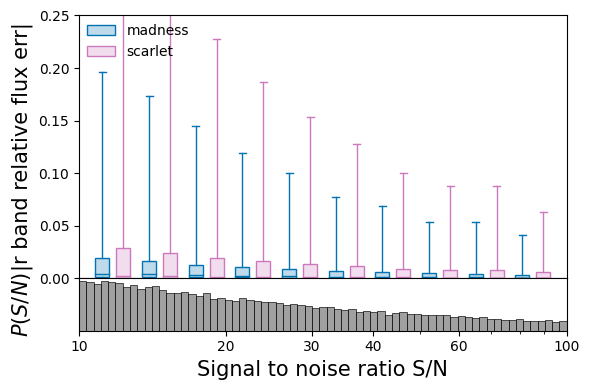

In [23]:
import maddeb.boxplot
import matplotlib as mpl

fig, median_fluxerr, q1_fluxerr, q3_fluxerr, whislo_fluxerr, whishi_fluxerr = maddeb.boxplot.boxplot_func(
    boxplot_snr_df, 
    x = 'snr', y = "r_relative_flux_err", z = "type",
    xlim = (10, 100),
    ylim = (0, 0.25), 
    x_scale = 'log',
    legend = ['madness', 'scarlet'],
    x_label='Signal to noise ratio S/N', 
    y_label = '|r band relative flux err|',
    y_label_hist='$P(S/N)$',
    legend_remove = False,
    x_ticks=[10, 20, 30, 40,  60, 100],
    whis = [5,95],
    percents = [25,75],
    palette = [madness_plot_color, scarlet_plot_color],#0.35,
    nbins = 10
)

plt.savefig(os.path.join("results", density_level + "_density", "snr_box_plot.pdf"))
plt.savefig(os.path.join("results", density_level + "_density", "snr_box_plot.png"))

In [15]:
madness_results

,u_covariance,u_blendedness,g_covariance,g_blendedness,r_covariance,r_blendedness,i_covariance,i_blendedness,z_covariance,z_blendedness,...,i_phot_flux,i_phot_fluxerrs,i_phot_flags,z_phot_flux,z_phot_fluxerrs,z_phot_flags,y_phot_flux,y_phot_fluxerrs,y_phot_flags,r_contamination
0,0.977776,0.248239,0.993304,0.275573,0.992960,0.158215,0.993830,0.106299,0.993017,0.064470,...,213708.339447,5916.884639,0,249847.329771,6857.154660,0,185966.028087,7378.951528,0,0.149589
1,0.995984,0.016532,0.999308,0.034262,0.999340,0.070219,0.999568,0.067102,0.999490,0.060278,...,151541.787744,4457.186950,0,144272.352717,5134.068179,0,75277.757477,5523.083233,0,0.096954
2,0.987873,0.025625,0.995172,0.049128,0.993242,0.077536,0.993839,0.099073,0.992284,0.101349,...,22850.989854,3171.942077,0,14340.139906,3620.703048,0,2327.346661,3872.451975,0,0.075821
3,0.927787,0.718546,0.941277,0.695392,0.944269,0.822937,0.928673,0.876841,0.935851,0.924391,...,73482.589303,3410.759684,0,91904.798302,3905.700773,0,71362.881682,4182.029703,0,5.610000
4,0.993852,0.000517,0.996184,0.000684,0.996865,0.001240,0.997316,0.001570,0.997680,0.001141,...,32545.813107,3821.246584,0,38251.008060,4394.888906,0,20093.479203,4713.810435,0,0.000760
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
319,0.763241,0.062509,0.987866,0.080568,0.992928,0.096173,0.990490,0.073908,0.989659,0.045955,...,30376.087615,3677.604072,0,26593.872077,4163.586625,0,11434.078734,4506.594429,0,0.080913
320,0.989680,0.011287,0.999080,0.007629,0.998933,0.007695,0.999111,0.006501,0.999010,0.008382,...,72430.724691,3147.997685,0,42392.233921,3556.932894,0,20948.493362,3835.568783,0,0.004617
321,0.995540,0.017800,0.997025,0.026836,0.996843,0.041607,0.996566,0.042018,0.997086,0.026870,...,35651.375041,3537.935322,0,42420.184035,4005.379920,0,18760.941017,4325.890064,0,0.028881
322,0.762086,0.711482,0.980510,0.710990,0.975134,0.762826,0.969563,0.674817,0.975070,0.642035,...,41451.880518,3232.691768,0,39427.721206,3655.287395,0,13205.140447,3941.161449,0,3.347219


In [16]:
np.sum(mask)

53446

In [17]:
boxplot_blendedness_df = {}

boxplot_blendedness_df['r_blendedness'] = list(madness_results['r_blendedness'][r_snr_mask])
boxplot_blendedness_df['r_contamination'] = list(madness_results['r_contamination'][r_snr_mask])
boxplot_blendedness_df["type"] = ["madness"] * len(madness_results[r_snr_mask])
boxplot_blendedness_df["r_relative_flux_err"] = list(np.abs(madness_results["r_phot_flux"].values[r_snr_mask] - actual_photometry["r_phot_flux"].values[r_snr_mask]) / actual_photometry["r_phot_flux"].values[r_snr_mask])


boxplot_blendedness_df['r_blendedness'].extend(list(scarlet_results['r_blendedness'][r_snr_mask]))
boxplot_blendedness_df['r_contamination'].extend(list(madness_results['r_contamination'][r_snr_mask]))
boxplot_blendedness_df["type"].extend(["scarlet"] * len(scarlet_results[r_snr_mask]))
boxplot_blendedness_df["r_relative_flux_err"].extend(list(np.abs(scarlet_results["r_phot_flux"].values[r_snr_mask] - actual_photometry["r_phot_flux"].values[r_snr_mask]) / actual_photometry["r_phot_flux"].values[r_snr_mask])) 

boxplot_blendedness_df = pd.DataFrame(boxplot_blendedness_df)

In [18]:
np.amin(boxplot_blendedness_df['r_blendedness'])

7.465522824379178e-07

['madness' 'scarlet']


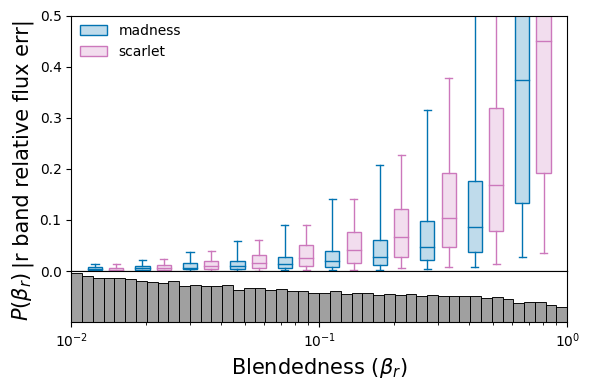

In [19]:
import maddeb.boxplot
import matplotlib as mpl

fig, median_shear, q1_shear, q3_shear, whislo_shear, whishi_shear = maddeb.boxplot.boxplot_func(
    boxplot_blendedness_df, 
    x = 'r_blendedness', y = "r_relative_flux_err", z = "type",
    xlim = (1e-2, 1),
    ylim = (-0, .5), 
    x_scale = 'log',
    legend = ['madness', 'scarlet'],
    x_label=r'Blendedness $(\beta_r)$', 
    y_label = '|r band relative flux err|',
    y_label_hist=r'$P(\beta_r)$',
    legend_remove = False,
    whis = [5, 95],
    percents = [25, 75],
    palette=[madness_plot_color, scarlet_plot_color],#0.35,
    nbins = 10,
)
plt.savefig(os.path.join("results", density_level + "_density", "blendedness_box_plot.pdf"))
plt.savefig(os.path.join("results", density_level + "_density",  "blendedness_box_plot.png"))

['madness' 'scarlet']


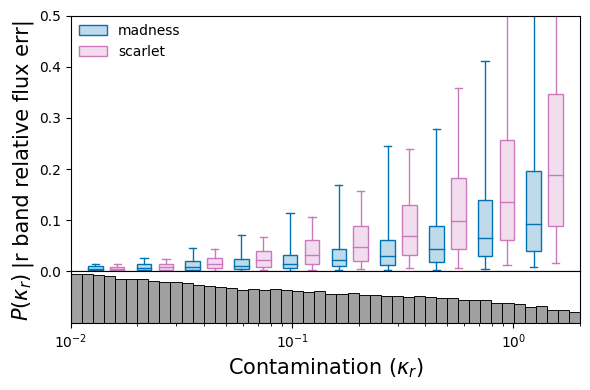

In [20]:
fig, median_shear, q1_shear, q3_shear, whislo_shear, whishi_shear = maddeb.boxplot.boxplot_func(
    boxplot_blendedness_df, 
    x = 'r_contamination', y = "r_relative_flux_err", z = "type",
    xlim = (1e-2, 2),
    ylim = (0, .5), 
    x_scale = 'log',
    legend = ['madness', 'scarlet'],
    x_label='Contamination $(\kappa_r)$', 
    y_label = '|r band relative flux err|',
    y_label_hist='$P(\kappa_r)$',
    legend_remove = False,
    whis = [5, 95],
    percents = [25, 75],
    palette=[madness_plot_color, scarlet_plot_color],#0.35,
    nbins = 10,
)
plt.savefig(os.path.join("results", density_level + "_density", "contamination_box_plot.pdf"))
plt.savefig(os.path.join("results", density_level + "_density",  "contamination_box_plot.png"))

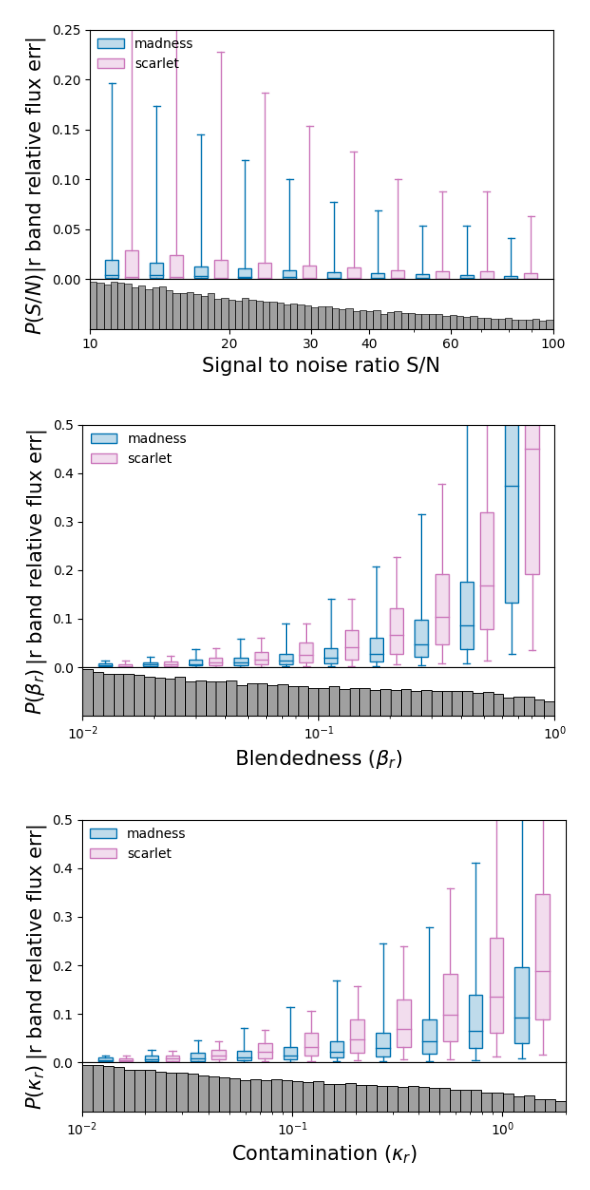

In [21]:
import matplotlib.image as mpimg

f, axarr = plt.subplots(3, 1, figsize=(8, 12))

#axarr[0].imshow(mpimg.imread(os.path.join(result_dir_path, "cumulative_distib_phot_err_r.png")))
axarr[0].imshow(mpimg.imread(os.path.join("results", density_level + "_density", "snr_box_plot.png")))
axarr[1].imshow(mpimg.imread(os.path.join("results", density_level + "_density", "blendedness_box_plot.png")))
axarr[2].imshow(mpimg.imread(os.path.join("results", density_level + "_density", "contamination_box_plot.png")))

# turn off x and y axis
[ax.set_axis_off() for ax in axarr.ravel()]
plt.tight_layout()

plt.savefig("results/" + density_level + "_density/boxplot_results.pdf", format="pdf", bbox_inches="tight")
plt.savefig("results/" + density_level + "_density/boxplot_results.png")

plt.show()